In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.evaluate_daxmodels import evaluate_different_daxmodels

from dax.help_functions.get_dax_data import get_prepared_data
#from dax.models.time_series_models.garch11_norm import get_garch_11_norm
#from dax.models.time_series_models.garch11_t import get_garch_11_t
from dax.models.ARMA_GARCH.arma_garch import get_arma_garch11_forecasts, get_arma_garch_opt_pq_forecasts, get_arma_garch_opt_pq_lag_forecasts
from dax.models.baseline import get_dax_forecasts_baseline
from dax.models.QuantReg.quantile_regression import get_quantile_regression_forecasts
from dax.models.QuantReg.QuantReg import get_QuantReg_forecasts, get_QuantReg_forecasts_abs
from dax.models.QuantReg.QuantRegFeatures import get_QuantRegFeatures_forecasts
from dax.models.ARMA_NN.arma_nn import get_arma_nn_forecasts
# from dax.models.combination.combined_models import combine_models


In [5]:
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn1 import get_arma_nn_forecasts1
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn2 import get_arma_nn_forecasts2
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn3 import get_arma_nn_forecasts3
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn4 import get_arma_nn_forecasts4
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn5 import get_arma_nn_forecasts5
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn6 import get_arma_nn_forecasts6
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn7 import get_arma_nn_forecasts7
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn8 import get_arma_nn_forecasts8
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn9 import get_arma_nn_forecasts9
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn10 import get_arma_nn_forecasts10
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn11 import get_arma_nn_forecasts11
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn12 import get_arma_nn_forecasts12
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn13 import get_arma_nn_forecasts13
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn14 import get_arma_nn_forecasts14
from dax.models.ARMA_NN.arma_nn_tryouts.arma_nn15 import get_arma_nn_forecasts15

In [2]:
import yfinance as yf
import pandas as pd

from datetime import timedelta

from evaluation.help_functions.prepare_data import most_recent_thursday
from dax.help_functions.calculate_returns import calculate_returns


def get_data():

    msft = yf.Ticker("^GDAXI")
    daxdata = msft.history(period="max")

    return (daxdata)

def get_prepared_data(daxdata=pd.DataFrame):

    if daxdata.empty:
        daxdata = get_data()

    daxdata = calculate_returns(daxdata, lags=5)
    start_date_excl = most_recent_thursday(daxdata) - timedelta(days=1)
    daxdata = daxdata.loc[(daxdata.index < start_date_excl)]
    daxdata = daxdata[[
        'Close', 'LogRetLag1', 'LogRetLag2', 'LogRetLag3', 'LogRetLag4', 'LogRetLag5']]
    daxdata = daxdata.dropna()

    return (daxdata)

In [3]:
dax_df = get_prepared_data()
dax_df = dax_df[:-15]
dax_df

Close  LogRetLag1  LogRetLag2  LogRetLag3  \
Date                                                                          
1988-01-08 00:00:00+01:00   1026.689941    1.197370    2.034796    3.024763   
1988-01-11 00:00:00+01:00    987.520020   -3.889849   -2.692479   -1.855053   
1988-01-12 00:00:00+01:00    986.890015   -0.063817   -3.953666   -2.756296   
1988-01-13 00:00:00+01:00    965.770020   -2.163287   -2.227104   -6.116953   
1988-01-14 00:00:00+01:00    974.460022    0.895776   -1.267511   -1.331328   
...                                 ...         ...         ...         ...   
2023-12-11 00:00:00+01:00  16794.429688    0.209867    0.989969    0.825037   
2023-12-12 00:00:00+01:00  16791.740234   -0.016015    0.193852    0.973954   
2023-12-13 00:00:00+01:00  16766.050781   -0.153106   -0.169121    0.040746   
2023-12-14 00:00:00+01:00  16752.230469   -0.082464   -0.235570   -0.251585   
2023-12-15 00:00:00+01:00  16751.439453   -0.004722   -0.087186   -0.240292   

                           LogRetLag4  LogRetLag5  
Date                                               
1988-01-08 00:00:00+01:00    7.082493    2.116340  
1988-01-11 00:00:00+01:00   -0.865086    3.192645  
1988-01-12 00:00:00+01:00   -1.918870   -0.928903  
1988-01-13 00:00:00+01:00   -4.919583   -4.082157  
1988-01-14 00:00:00+01:00   -5.221176   -4.023806  
...                               ...         ...  
2023-12-11 00:00:00+01:00    1.568227    2.347574  
2023-12-12 00:00:00+01:00    0.809022    1.552211  
2023-12-13 00:00:00+01:00    0.820848    0.655916  
2023-12-14 00:00:00+01:00   -0.041718    0.738384  
2023-12-15 00:00:00+01:00   -0.256307   -0.046440  

[9089 rows x 6 columns]

In [6]:
nn1 = {
    'name': 'nn1',
    'function': get_arma_nn_forecasts1
}

nn2 = {
    'name': 'nn2',
    'function': get_arma_nn_forecasts2
}

nn3 = {
    'name': 'nn3',
    'function': get_arma_nn_forecasts3
}

nn4 = {
    'name': 'nn4',
    'function': get_arma_nn_forecasts4
}

nn5 = {
    'name': 'nn5',
    'function': get_arma_nn_forecasts5
}

nn6 = {
    'name': 'nn6',
    'function': get_arma_nn_forecasts6
}

nn7 = {
    'name': 'nn1',
    'function': get_arma_nn_forecasts7
}

nn8 = {
    'name': 'nn1',
    'function': get_arma_nn_forecasts8
}

nn9 = {
    'name': 'nn9',
    'function': get_arma_nn_forecasts9
}

nn10 = {
    'name': 'nn10',
    'function': get_arma_nn_forecasts10
}

nn11 = {
    'name': 'nn11',
    'function': get_arma_nn_forecasts11
}

nn12 = {
    'name': 'nn12',
    'function': get_arma_nn_forecasts12
}

nn13 = {
    'name': 'nn13',
    'function': get_arma_nn_forecasts13
}

nn14 = {
    'name': 'nn14',
    'function': get_arma_nn_forecasts14
}

nn15 = {
    'name': 'nn15',
    'function': get_arma_nn_forecasts15
}

models = [nn2, nn3, nn4, nn5, nn6, nn7, nn8, nn9, nn10, nn11, nn12, nn13, nn14, nn15] 

In [14]:
baseline = {
    'name': 'baseline',
    'function': get_dax_forecasts_baseline
}
quantile_regression = {
    'name': 'Quantile Regression',
    'function': get_quantile_regression_forecasts
}

QuantReg = {
    'name': 'QuantReg',
    'function': get_QuantReg_forecasts
}

QuantRegAbs= {
    'name': 'QuantRegAbs',
    'function': get_QuantReg_forecasts_abs
}

QuantRegFeatures = {
    'name': 'QuantReg Features',
    'function': get_QuantRegFeatures_forecasts
}

QuantRegAbs = {    
    'name': 'QuantRegAbs',
    'function': get_QuantReg_forecasts_abs
}

garch11 = {
    'name': 'GARCH(1,1)',
    'function': get_arma_garch11_forecasts
}

garch11_opt_pq = {
    'name': 'GARCH(p,q)',
    'function': get_arma_garch_opt_pq_forecasts
}

garch11_opt_lags_pq = {
    'name': 'GARCH(p,q, lags)',
    'function': get_arma_garch_opt_pq_lag_forecasts
}

arma_nn = {
    'name': 'ARMA(p,q) NN',
    'function': get_arma_nn_forecasts
}

models = [arma_nn, QuantRegFeatures, baseline,QuantRegAbs,garch11_opt_pq] 

In [7]:
evaluation = evaluate_different_daxmodels(models,dax_df, last_x=20, years=False, months=False, weeks=True)

c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmo

## Visualize Comparsion

In [9]:
mean_scores = {
    'mean_scores_garch11': np.mean(models[0]['evaluation']['score']),
    'mean_scores_baseline': np.mean(models[1]['evaluation']['score']),
    'mean_scores_quantile':np.mean(models[2]['evaluation']['score']),
    'mean_scores_garchpq': np.mean(models[3]['evaluation']['score']),
    'mean_scores_garchpqlag': np.mean(models[4]['evaluation']['score']) }
mean_scores

{'mean_scores_garch11': 6.408026713211671,
 'mean_scores_baseline': 4.141486179806666,
 'mean_scores_quantile': 3.157968207420516,
 'mean_scores_garchpq': 4.248556736049369,
 'mean_scores_garchpqlag': 3.515939338524906}

In [17]:
horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
quantile_scores_per_model = {}

for m in range(0,len(models)):
    quantile_scores = {}
    evaluation_frame = models[m]['evaluation']
    for h in horizons: 
        day_frame = evaluation_frame.loc[evaluation_frame['horizon'] == h]
        quantile_scores.update({h: np.mean(day_frame['score'])})
    
    quantile_scores_per_model.update({models[m]['name']: quantile_scores})

quantile_scores_per_model
    

{'nn2': {'1 day': 1.9593906528157499,
  '2 day': 2.8865603512470153,
  '5 day': 4.2960875070827145,
  '6 day': 3.6871989013593733,
  '7 day': 7.878193486528478},
 'nn3': {'1 day': 1.8717409476338875,
  '2 day': 2.727407855100921,
  '5 day': 3.4428455227997126,
  '6 day': 3.3797737912367687,
  '7 day': 4.368072920331289},
 'nn4': {'1 day': 3.0883221077008365,
  '2 day': 3.791578460788184,
  '5 day': 2.9715798889951537,
  '6 day': 4.29557601292679,
  '7 day': 7.095727209835878},
 'nn5': {'1 day': 2.104817709365653,
  '2 day': 3.376510217825878,
  '5 day': 3.367506520481244,
  '6 day': 4.103781403506267,
  '7 day': 4.627080841445487},
 'nn6': {'1 day': 2.1320654274521895,
  '2 day': 3.2723019396985507,
  '5 day': 4.4097778740254725,
  '6 day': 4.098387602164464,
  '7 day': 18.127600722717677},
 'nn1': {'1 day': 2.3441628340931797,
  '2 day': 2.8456172682515906,
  '5 day': 2.782183162062411,
  '6 day': 5.082526158026017,
  '7 day': 5.421596296181977},
 'nn9': {'1 day': 2.3624964368907784,


In [18]:
# create table only containing different scores of different models

horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

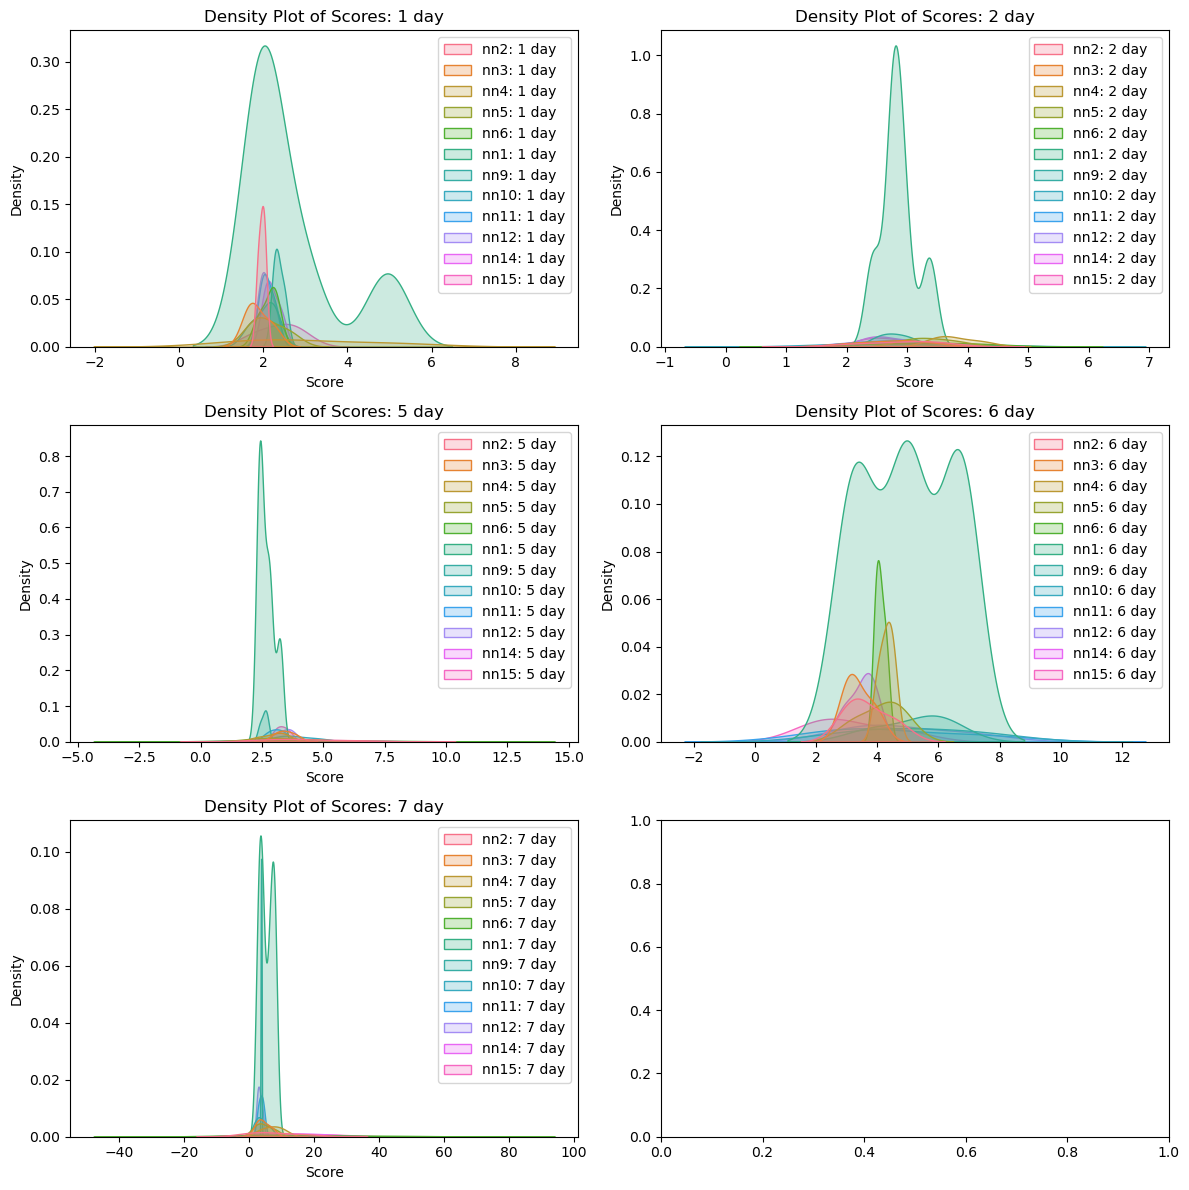

In [19]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

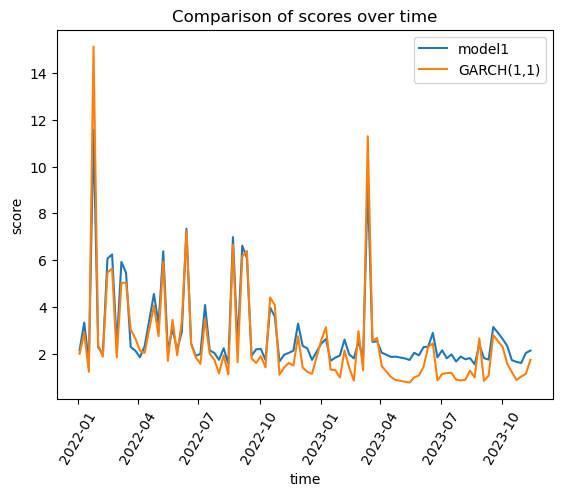

In [9]:
# Plot values from two columns over time
score_df_1d_no_na = score_df[score_df['model1: 5 day'].notna()]
score_df_garch_no_na = score_df[score_df['GARCH(1,1) model: 5 day'].notna()]

plt.plot(score_df_1d_no_na.index,
         score_df_1d_no_na['model1: 5 day'], label='model1')
plt.plot(score_df_garch_no_na.index, score_df_garch_no_na['GARCH(1,1) model: 5 day'], label='GARCH(1,1)')

# Adding labels and title
plt.xlabel('time')
plt.xticks(rotation=60)
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()

### Interpretation
GARCH(1,1) better than baseline (model1). 